In [25]:
import pandas as pd


In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def plot_avg_4df(df1, df2, df3, df4, names, num_xticks=10):
    """
    Plot rata-rata dari 4 DataFrame.
    Sumbu X akan mengikuti nama kolom (harus bisa dikonversi ke angka).
    """
    # Validasi nama
    if len(names) != 4:
        raise ValueError("Parameter 'names' harus berisi 4 nama sesuai jumlah DataFrame.")

    # Pastikan semua DF memiliki kolom yang sama
    common_cols = (
        df1.columns.intersection(df2.columns)
        .intersection(df3.columns)
        .intersection(df4.columns)
    )
    df1, df2, df3, df4 = (
        df1[common_cols],
        df2[common_cols],
        df3[common_cols],
        df4[common_cols],
    )

    # Ubah kolom ke nilai numerik (misalnya 1789.56)
    try:
        x_vals = common_cols.astype(float)
    except Exception:
        raise ValueError("Kolom harus berupa angka (atau dapat dikonversi ke float).")

    # Hitung rata-rata tiap kolom
    avg1 = df1.mean()
    avg2 = df2.mean()
    avg3 = df3.mean()
    avg4 = df4.mean()

    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(x_vals, avg1, label=names[0], linewidth=2)
    plt.plot(x_vals, avg2, label=names[1], linewidth=2)
    plt.plot(x_vals, avg3, label=names[2], linewidth=2)
    plt.plot(x_vals, avg4, label=names[3], linewidth=2)

    # Tentukan tick berdasarkan data asli, tapi dibatasi jumlahnya
    tick_positions = np.linspace(x_vals.min(), x_vals.max(), num_xticks)
    tick_positions = np.round(tick_positions).astype(int)  # pastikan bilangan bulat

    plt.xticks(tick_positions, rotation=0)
    plt.xlabel("wavelength (nm)")
    plt.ylabel("reflectance")
    plt.title("")
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()


In [27]:
df_basah = pd.read_csv('../../raw_data/DATA_NIR_BASAH_KADAR_AIR_800.csv')

df_basah.drop(columns=['SAMPEL','KADAR AIR'], inplace=True)
df_basah = df_basah.dropna(axis=1)
df_basah

,954.165,960.187,966.207,972.224,978.239,984.252,990.262,996.27,1002.275,1008.278,...,1648.528,1654.273,1660.015,1665.755,1671.492,1677.227,1682.96,1688.691,1694.419,1700.144
0,47.740000,47.680000,47.280000,47.030000,46.810000,46.750000,46.630000,46.51000,46.640000,46.560000,...,18.830000,18.800000,18.79000,18.600000,18.590000,18.730000,19.150000,19.530000,20.090000,20.470000
1,39.180000,39.180000,38.820000,38.610000,38.410000,38.370000,38.250000,38.12000,38.270000,38.180000,...,15.860000,15.850000,15.88000,15.740000,15.770000,15.920000,16.380000,16.820000,17.440000,17.890000
2,64.020000,64.000000,63.610000,63.400000,63.240000,63.270000,63.230000,63.19000,63.480000,63.490000,...,31.890000,31.840000,31.79000,31.550000,31.590000,31.870000,32.470000,32.910000,33.340000,33.590000
3,66.950000,66.950000,66.560000,66.380000,66.250000,66.320000,66.310000,66.30000,66.620000,66.660000,...,34.160000,34.150000,34.14000,33.920000,33.970000,34.240000,34.820000,35.190000,35.520000,35.700000
4,39.810000,39.840000,39.510000,39.330000,39.150000,39.140000,39.020000,38.91000,39.090000,39.020000,...,16.570000,16.550000,16.57000,16.400000,16.400000,16.530000,16.970000,17.340000,17.900000,18.290000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,46.570000,46.740000,46.280000,46.090000,45.820000,45.860000,45.690000,45.50000,45.890000,45.790000,...,22.220000,22.320000,22.56000,22.400000,22.520000,22.880000,23.900000,24.760000,25.860000,26.600000
797,49.680000,49.820000,49.290000,49.060000,48.760000,48.770000,48.570000,48.39000,48.790000,48.700000,...,21.500000,21.590000,21.81000,21.620000,21.750000,22.130000,23.200000,24.150000,25.370000,26.190000
798,27.780000,27.930000,27.510000,27.350000,27.120000,27.150000,26.970000,26.79000,27.130000,27.030000,...,11.800000,11.900000,12.15000,12.010000,12.090000,12.300000,13.090000,13.800000,14.860000,15.630000
799,43.460000,43.600000,43.100000,42.860000,42.570000,42.570000,42.370000,42.17000,42.540000,42.430000,...,18.370000,18.470000,18.70000,18.550000,18.670000,19.000000,19.990000,20.890000,22.110000,22.940000


In [28]:
df_fermentasi = pd.read_csv('../../raw_data/DATA_NIR_FERMENTASI_KADAR_AIR_800.csv')
df_fermentasi.drop(columns=['SAMPEL','KADAR AIR'], inplace=True)
df_fermentasi = df_fermentasi.dropna(axis=1)
df_fermentasi

,954.165,960.187,966.207,972.224,978.239,984.252,990.262,996.27,1002.275,1008.278,...,1648.528,1654.273,1660.015,1665.755,1671.492,1677.227,1682.96,1688.691,1694.419,1700.144
0,42.54,42.52,42.27,42.19,42.18,42.29,42.35,42.44,42.77,42.92,...,21.97,22.07,22.18,22.10,22.03,21.98,22.09,22.12,22.26,22.37
1,25.83,25.83,25.57,25.49,25.46,25.57,25.63,25.71,26.04,26.19,...,11.01,11.08,11.19,11.14,11.12,11.12,11.30,11.46,11.78,12.02
2,48.77,48.71,48.38,48.27,48.27,48.42,48.53,48.70,49.16,49.42,...,23.10,23.28,23.47,23.46,23.48,23.55,23.86,24.18,24.65,25.00
3,44.29,44.26,43.94,43.82,43.78,43.89,43.94,44.05,44.44,44.63,...,20.16,20.31,20.48,20.45,20.46,20.54,20.86,21.18,21.68,22.04
4,40.73,40.73,40.46,40.37,40.35,40.47,40.51,40.60,40.96,41.12,...,18.35,18.45,18.59,18.53,18.53,18.58,18.83,19.06,19.43,19.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,53.04,53.01,52.82,52.80,52.86,53.07,53.28,53.52,53.90,54.21,...,27.47,27.54,27.65,27.62,27.59,27.47,27.38,27.22,27.07,27.00
795,48.91,48.93,48.84,48.88,48.97,49.16,49.36,49.57,49.90,50.14,...,25.02,25.01,25.01,24.88,24.72,24.47,24.21,23.87,23.54,23.35
796,49.79,49.81,49.73,49.78,49.91,50.14,50.37,50.61,50.96,51.23,...,22.72,22.69,22.67,22.51,22.35,22.10,21.86,21.54,21.24,21.07
797,45.04,45.01,44.84,44.84,44.90,45.11,45.30,45.53,45.86,46.14,...,21.63,21.67,21.73,21.67,21.59,21.46,21.35,21.18,21.04,20.97


In [29]:
df_kering = pd.read_csv('../../raw_data/DATA_NIR_KERING_KADAR_AIR_800.csv')
df_kering.drop(columns=['SAMPEL','KADAR AIR'], inplace=True)
df_kering = df_kering.dropna(axis=1)
df_kering


,954.165,960.187,966.207,972.224,978.239,984.252,990.262,996.27,1002.275,1008.278,...,1648.528,1654.273,1660.015,1665.755,1671.492,1677.227,1682.96,1688.691,1694.419,1700.144
0,42.05,42.22,42.35,42.48,42.56,42.69,42.74,42.79,42.91,42.91,...,25.15,24.97,24.69,24.23,23.73,23.17,22.59,21.81,20.96,20.42
1,43.30,43.46,43.58,43.73,43.82,43.98,44.04,44.09,44.20,44.20,...,25.94,25.73,25.39,24.86,24.26,23.59,22.88,21.94,20.93,20.28
2,20.37,20.47,20.48,20.52,20.54,20.61,20.61,20.59,20.67,20.65,...,11.30,11.24,11.17,10.97,10.77,10.56,10.41,10.22,10.05,9.97
3,33.71,33.83,33.82,33.85,33.83,33.90,33.86,33.83,33.88,33.81,...,18.00,17.85,17.63,17.25,16.83,16.40,16.02,15.50,14.99,14.66
4,33.76,33.86,33.86,33.89,33.88,33.94,33.92,33.89,33.96,33.92,...,18.44,18.29,18.08,17.71,17.32,16.94,16.61,16.15,15.68,15.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,28.99,29.24,29.20,29.24,29.18,29.26,29.21,29.12,29.38,29.30,...,18.96,18.90,18.91,18.69,18.59,18.58,18.90,19.17,19.52,19.77
796,27.90,28.12,28.02,28.00,27.90,27.94,27.85,27.71,27.94,27.84,...,18.19,18.18,18.27,18.12,18.08,18.11,18.46,18.77,19.22,19.54
797,28.59,28.80,28.67,28.61,28.47,28.47,28.34,28.17,28.38,28.23,...,16.76,16.74,16.81,16.63,16.55,16.54,16.86,17.14,17.57,17.88
798,19.40,19.57,19.40,19.31,19.17,19.16,19.03,18.87,19.05,18.90,...,10.13,10.14,10.22,10.07,10.01,10.01,10.30,10.56,11.00,11.33


In [30]:
df_kering

,954.165,960.187,966.207,972.224,978.239,984.252,990.262,996.27,1002.275,1008.278,...,1648.528,1654.273,1660.015,1665.755,1671.492,1677.227,1682.96,1688.691,1694.419,1700.144
0,42.05,42.22,42.35,42.48,42.56,42.69,42.74,42.79,42.91,42.91,...,25.15,24.97,24.69,24.23,23.73,23.17,22.59,21.81,20.96,20.42
1,43.30,43.46,43.58,43.73,43.82,43.98,44.04,44.09,44.20,44.20,...,25.94,25.73,25.39,24.86,24.26,23.59,22.88,21.94,20.93,20.28
2,20.37,20.47,20.48,20.52,20.54,20.61,20.61,20.59,20.67,20.65,...,11.30,11.24,11.17,10.97,10.77,10.56,10.41,10.22,10.05,9.97
3,33.71,33.83,33.82,33.85,33.83,33.90,33.86,33.83,33.88,33.81,...,18.00,17.85,17.63,17.25,16.83,16.40,16.02,15.50,14.99,14.66
4,33.76,33.86,33.86,33.89,33.88,33.94,33.92,33.89,33.96,33.92,...,18.44,18.29,18.08,17.71,17.32,16.94,16.61,16.15,15.68,15.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,28.99,29.24,29.20,29.24,29.18,29.26,29.21,29.12,29.38,29.30,...,18.96,18.90,18.91,18.69,18.59,18.58,18.90,19.17,19.52,19.77
796,27.90,28.12,28.02,28.00,27.90,27.94,27.85,27.71,27.94,27.84,...,18.19,18.18,18.27,18.12,18.08,18.11,18.46,18.77,19.22,19.54
797,28.59,28.80,28.67,28.61,28.47,28.47,28.34,28.17,28.38,28.23,...,16.76,16.74,16.81,16.63,16.55,16.54,16.86,17.14,17.57,17.88
798,19.40,19.57,19.40,19.31,19.17,19.16,19.03,18.87,19.05,18.90,...,10.13,10.14,10.22,10.07,10.01,10.01,10.30,10.56,11.00,11.33


In [31]:
df_roasting = pd.read_csv('../../raw_data/DATA_NIR_ROASTING_KADAR_AIR_800.csv')
df_roasting.drop(columns=['SAMPEL','KADAR AIR'], inplace=True)
df_roasting = df_roasting.dropna(axis=1)
df_roasting

,954.165,960.187,966.207,972.224,978.239,984.252,990.262,996.27,1002.275,1008.278,...,1648.528,1654.273,1660.015,1665.755,1671.492,1677.227,1682.96,1688.691,1694.419,1700.144
0,36.94,37.14,37.25,37.35,37.38,37.49,37.51,37.55,37.72,37.78,...,23.26,23.05,22.76,22.29,21.82,21.33,20.88,20.31,19.71,19.35
1,36.72,36.95,37.16,37.35,37.48,37.67,37.78,37.90,38.15,38.26,...,25.61,25.34,24.97,24.40,23.84,23.25,22.68,21.92,21.09,20.56
2,19.79,20.03,20.29,20.56,20.79,21.06,21.29,21.51,21.85,22.09,...,17.82,17.61,17.34,16.93,16.54,16.13,15.76,15.24,14.64,14.25
3,47.69,48.03,48.45,48.87,49.23,49.68,50.04,50.38,50.85,51.22,...,48.74,48.52,48.22,47.70,47.18,46.59,45.99,45.22,44.30,43.71
4,35.73,36.01,36.33,36.65,36.91,37.23,37.48,37.70,38.05,38.28,...,26.61,26.34,25.98,25.45,24.94,24.41,23.89,23.19,22.38,21.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,41.86,42.05,42.21,42.35,42.44,42.61,42.71,42.81,43.00,43.12,...,30.28,29.94,29.45,28.72,27.96,27.22,26.45,25.47,24.30,23.56
796,45.33,45.54,45.74,45.93,46.06,46.25,46.39,46.51,46.74,46.89,...,33.78,33.45,32.98,32.31,31.64,31.00,30.38,29.60,28.66,28.07
797,26.35,26.63,26.97,27.30,27.60,27.95,28.25,28.54,28.95,29.27,...,28.00,27.70,27.26,26.62,25.96,25.35,24.75,23.96,22.96,22.32
798,43.05,43.34,43.68,44.00,44.27,44.59,44.83,45.04,45.34,45.56,...,34.10,33.76,33.22,32.44,31.58,30.67,29.69,28.46,27.06,26.17


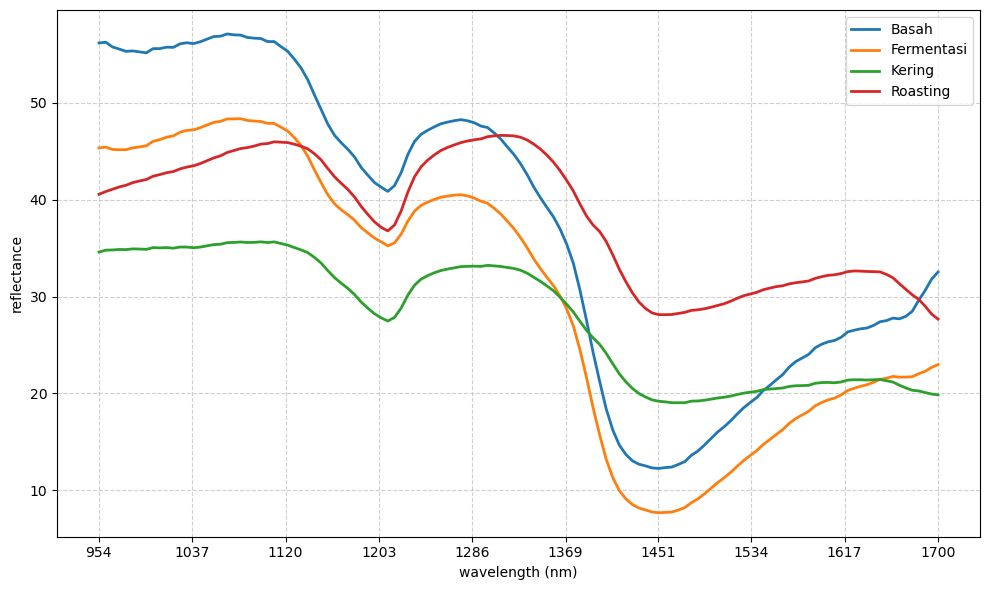

In [32]:
plot_avg_4df(df_basah, df_fermentasi, df_kering, df_roasting,['Basah', 'Fermentasi', 'Kering', 'Roasting'], num_xticks=10)